Plot saved to D:\dev\builder-regulator-balance\reports\figures\civilizational_balance_plot.png


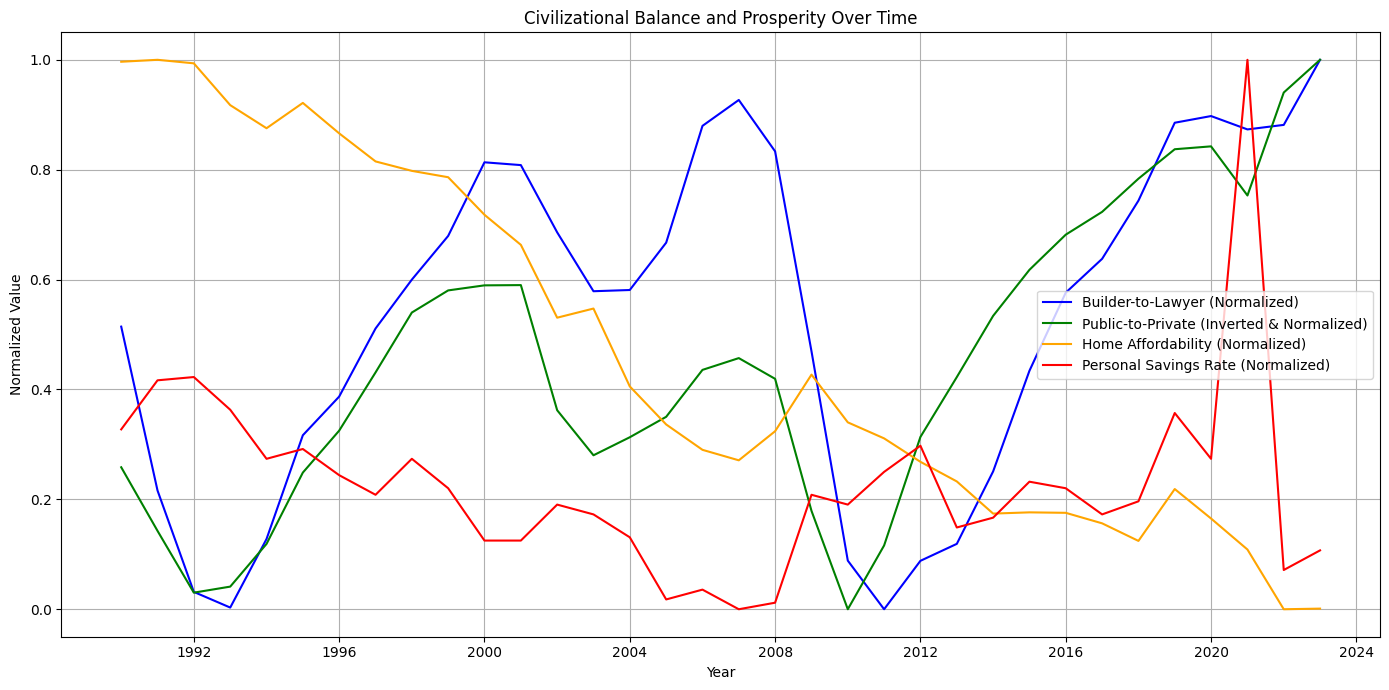

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys

# Add the src directory to sys.path
src_path = os.path.abspath("../src")
if src_path not in sys.path:
    sys.path.append(src_path)
from config import RAW_DATA_DIR, FIGURES_DIR

# Load FRED CSVs (assumes 'observation_date' column and 1 value column)
def load_fred_csv(filename, new_name):
    path = RAW_DATA_DIR / filename
    df = pd.read_csv(path, parse_dates=['observation_date'], index_col='observation_date')
    df.columns = [new_name]
    return df

# Load data
construction = load_fred_csv('CES2000000001.csv', 'Construction')
legal = load_fred_csv('CES6054300001.csv', 'Legal_Services')
gov = load_fred_csv('CES9000000001.csv', 'Government')
private = load_fred_csv('CES0500000001.csv', 'Private_Sector')
income = load_fred_csv('MEHOINUSA672N.csv', 'Median_Income')
home_price = load_fred_csv('MSPUS.csv', 'Median_Home_Price')
savings = load_fred_csv('PSAVERT.csv', 'Personal_Savings_Rate')

# Join employment and prosperity data
df = construction.join([legal, gov, private, income, home_price, savings], how='inner')

# Feature Engineering
df['Builder_to_Lawyer'] = df['Construction'] / df['Legal_Services']
df['Public_to_Private'] = df['Government'] / df['Private_Sector']
df['Home_Affordability'] = df['Median_Income'] / df['Median_Home_Price']

# Normalize and invert as needed
df['Builder_Norm'] = (df['Builder_to_Lawyer'] - df['Builder_to_Lawyer'].min()) / (df['Builder_to_Lawyer'].max() - df['Builder_to_Lawyer'].min())
df['Regulator_Norm'] = 1 - (df['Public_to_Private'] - df['Public_to_Private'].min()) / (df['Public_to_Private'].max() - df['Public_to_Private'].min())
df['Affordability_Norm'] = (df['Home_Affordability'] - df['Home_Affordability'].min()) / (df['Home_Affordability'].max() - df['Home_Affordability'].min())
df['Savings_Norm'] = (df['Personal_Savings_Rate'] - df['Personal_Savings_Rate'].min()) / (df['Personal_Savings_Rate'].max() - df['Personal_Savings_Rate'].min())

# Plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Builder_Norm'], label='Builder-to-Lawyer (Normalized)', color='blue')
plt.plot(df.index, df['Regulator_Norm'], label='Public-to-Private (Inverted & Normalized)', color='green')
plt.plot(df.index, df['Affordability_Norm'], label='Home Affordability (Normalized)', color='orange')
plt.plot(df.index, df['Savings_Norm'], label='Personal Savings Rate (Normalized)', color='red')

plt.title('Civilizational Balance and Prosperity Over Time')
plt.xlabel('Year')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

plot_path = FIGURES_DIR / "civilizational_balance_plot.png"
plt.savefig(plot_path)
print(f"Plot saved to {plot_path}")

plt.show()